In [1]:
 import numpy as np
# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [2]:
#a list with all the VISpm sessions 

session_vispm_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'VISpm' in structure_list:
        session_vispm_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_vispm_list))+' sessions that meet this criteria:')
print(session_vispm_list)

There are 36 sessions that meet this criteria:
[715093703, 719161530, 732592105, 737581020, 742951821, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 758798717, 759883607, 760345702, 760693773, 761418226, 767871931, 771160300, 771990200, 778240327, 778998620, 779839471, 786091066, 791319847, 794812542, 797828357, 816200189, 819186360, 821695405, 831882777, 839068429, 839557629, 840012044, 847657808]


In [3]:
# a list with all the VISp sessions 
session_visp_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'VISp' in structure_list:
        session_visp_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_visp_list))+' sessions that meet this criteria:')
print(session_visp_list)

There are 56 sessions that meet this criteria:
[715093703, 719161530, 721123822, 732592105, 737581020, 739448407, 742951821, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 758798717, 759883607, 760345702, 760693773, 761418226, 762120172, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]


In [4]:
# the first session in the VISp list 
session = cache.get_session_data(session_visp_list[0])

In [5]:
# all the sessions in VISp with the stimulus flash 
session.get_stimulus_table(['flashes'])

,color,contrast,orientation,phase,pos,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,
3647,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1274.523973,1,flashes,1274.774189,0.250216,244
3648,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1276.525623,1,flashes,1276.775842,0.250219,244
3649,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1278.527343,1,flashes,1278.777552,0.250209,245
3650,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1280.529013,1,flashes,1280.779222,0.250209,244
3651,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1282.530723,1,flashes,1282.780924,0.250201,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1564.766513,1,flashes,1565.016712,0.250199,245
3793,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1566.768143,1,flashes,1567.018352,0.250209,244
3794,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1568.769833,1,flashes,1569.020042,0.250209,244


In [6]:
#peristimulus time histograms of VISp 
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

/opt/conda/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950930145 ... 950933960

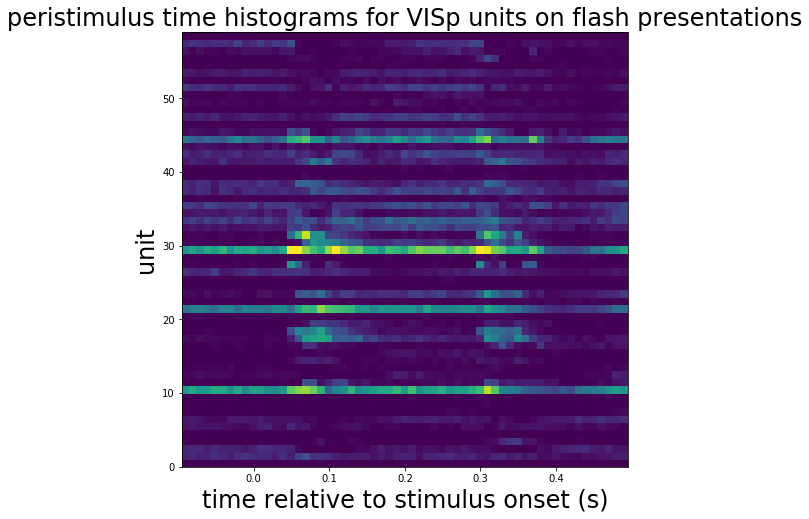

In [8]:
#peristimulus time histograms of VISp
import matplotlib.pyplot as plt
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

In [9]:
# the first session in the VISpm list 
session = cache.get_session_data(session_vispm_list[0])

In [10]:
#peristimulus time histograms of VISpm
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISpm']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

/opt/conda/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950918280 ... 950920434

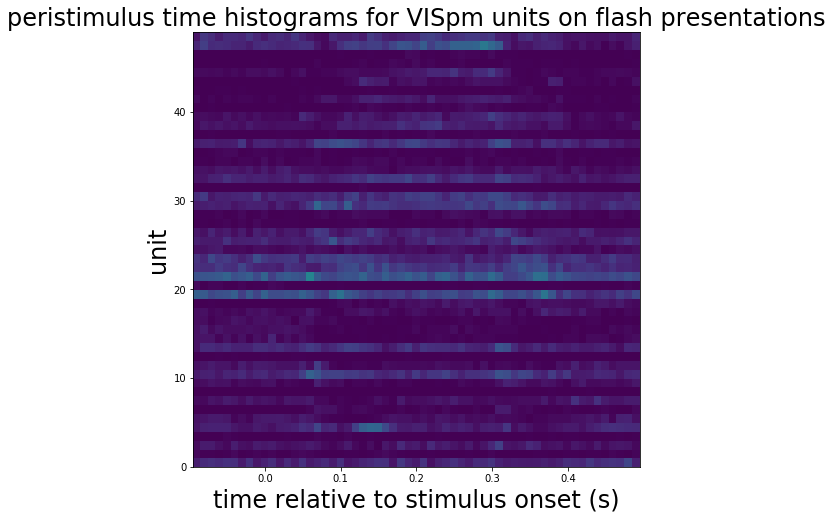

In [11]:
#peristimulus time histograms of VISpm
import matplotlib.pyplot as plt
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISpm units on flash presentations", fontsize=24)

plt.show()

In [12]:
#we chose a set of units in VISpm, then created a DataArray containing binned spikes aligned to the start of each stimulus.
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da = optotagging_spike_counts(bin_edges, trials, units)

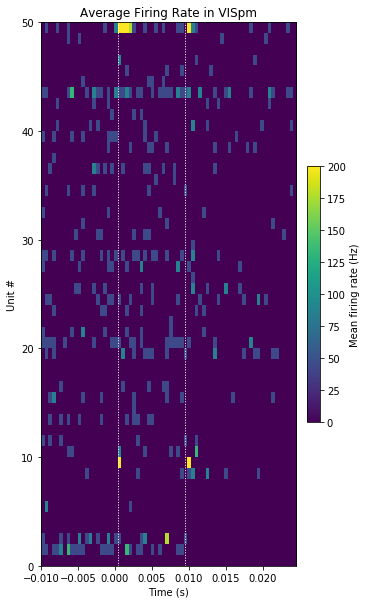

In [13]:
#We used this DataArray to plot the average firing rate for each unit in VISpm as a function of time
import matplotlib.pyplot as plt
def plot_optotagging_response(da):

    plt.figure(figsize=(5,10))

    plt.imshow(da.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da)
plt.title('Average Firing Rate in VISpm')
plt.show()

In [14]:
#we searched for units in VISpm that increase their firing rate during the 10 ms pulse
baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Text(0.5, 1.0, 'VISpm Baseline Rate vs Evoked Rate')

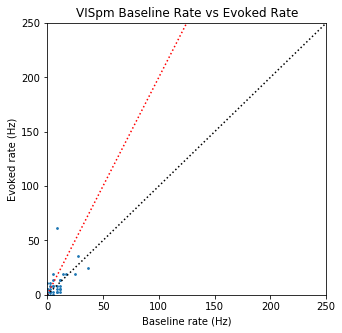

In [15]:
#We compared the baseline and evoked rates and saw a subset of units in VISpm with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')

plt.title('VISpm Baseline Rate vs Evoked Rate')

In [16]:
#select a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISpm
cre_pos_units_vispm = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units_vispm

array([950918280, 950918175, 950918344, 950918362, 950918491, 950918570,
       950919054, 950919249, 950919120, 950919496, 950919748])

In [17]:
#create an empty column "cell_type" for vispm units 
import pandas as pd
df_vispm_units=session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]
df_vispm_units['cell_type']=''
cre_pos_units_vispm=list(cre_pos_units_vispm)
df_vispm_units_index = df_vispm_units.index.values.tolist()
id = df_vispm_units.index.values.tolist()


df_vispm_units_rows = len(df_vispm_units.axes[0])

#assign PV+/PV- to the cell type column 
for i in range(df_vispm_units_rows):
    if id[i] in cre_pos_units_vispm:
        df_vispm_units.at[id [i],'cell_type']='PV+'
    else:
        df_vispm_units.at[id [i],'cell_type']='PV-'

df_vispm_units

,amplitude_cutoff,max_drift,d_prime,waveform_halfwidth,waveform_velocity_above,cluster_id,local_index_unit,nn_miss_rate,silhouette_score,isolation_distance,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
950918280,0.009409,45.97,NaN,0.206030,-0.343384,355,352,0.000000,0.010076,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
950918261,0.015334,49.52,1.052450,0.288442,0.000000,354,351,0.009140,-0.001854,21.944732,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918246,0.019391,43.64,1.950015,0.178559,0.000000,353,350,0.007217,0.063762,25.443306,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918191,0.064449,27.42,0.811729,0.206030,0.000000,350,347,0.006279,-0.034263,18.922817,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918175,0.009991,50.45,0.857892,0.219765,0.343384,349,346,0.048419,0.019923,27.129323,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
950918344,0.000475,53.90,NaN,NaN,1.373534,359,356,0.000000,0.105750,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
950918310,0.081044,64.91,NaN,1.098827,-13.735343,357,354,0.000000,0.075751,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918381,0.001747,43.34,NaN,1.222446,1.373534,361,358,0.000000,0.071780,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918362,0.011477,31.79,NaN,0.219765,0.686767,360,357,0.000000,0.043042,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+


In [18]:
#PV+/- neurons with their corresponding firing rate in VISpm
df_vispm_firing_rate = df_vispm_units[['firing_rate','cell_type']]
df_vispm_firing_rate

,firing_rate,cell_type
unit_id,,
950918280,9.490555,PV+
950918261,3.599157,PV-
950918246,4.300158,PV-
950918191,1.381232,PV-
950918175,8.012252,PV+
950918344,4.035978,PV+
950918310,10.602179,PV-
950918381,6.730596,PV-
950918362,3.497910,PV+


In [19]:
# we chose a stimulus condition (10 ms pulses) and a set of units in VISp, then created a DataArray containing binned spikes aligned to the start of each stimulus.
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da = optotagging_spike_counts(bin_edges, trials, units)


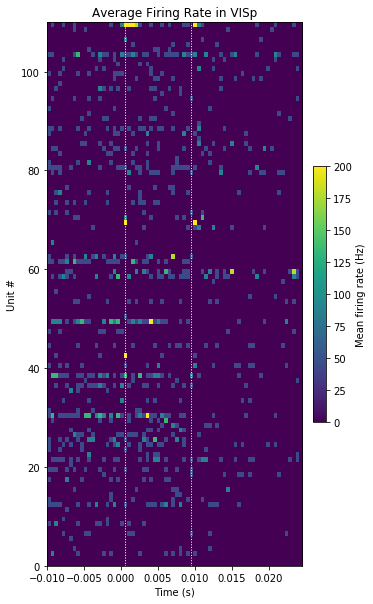

In [20]:
#We used this DataArray to plot the average firing rate for each unit in VISp as a function of time
import matplotlib.pyplot as plt
def plot_optotagging_response(da):

    plt.figure(figsize=(5,10))

    plt.imshow(da.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')
    plt.title('Average Firing Rate in VISp')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da)
plt.show()

In [21]:
#we searched for units in VISp that increase their firing rate during the 10 ms pulse
baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

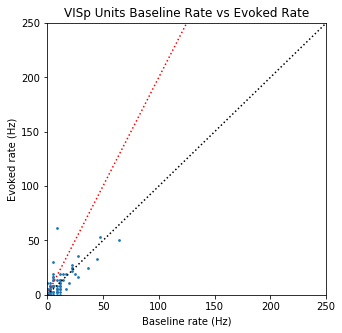

In [22]:
#We compared the baseline and evoked rates and saw a subset of units in VISp with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')
plt.title('VISp Units Baseline Rate vs Evoked Rate')
plt.show()

In [23]:
#select a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISp
cre_pos_units_visp = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units_visp

array([950918280, 950918175, 950918344, 950918362, 950918491, 950918570,
       950919054, 950919249, 950919120, 950919496, 950919748, 950930145,
       950930358, 950931423, 950931363, 950933840, 950931727, 950931853])

In [24]:
#create an empty column "cell_type" for visp units 
import pandas as pd
cre_pos_units_visp=list(cre_pos_units_visp)
df_visp_units=session.units[session.units.ecephys_structure_acronym.str.match('VISp')]
df_visp_units_index = df_visp_units.index.values.tolist()
df_visp_units['cell_type']=''
id = df_visp_units.index.values.tolist()


df_visp_units_rows = len(df_visp_units.axes[0])

#assign PV+/PV- to the cell type column 
for i in range(df_visp_units_rows):
    if id[i] in cre_pos_units_visp:
        df_visp_units.at[id [i],'cell_type']='PV+'
    else:
        df_visp_units.at[id [i],'cell_type']='PV-'

df_visp_units

,amplitude_cutoff,max_drift,d_prime,waveform_halfwidth,waveform_velocity_above,cluster_id,local_index_unit,nn_miss_rate,silhouette_score,isolation_distance,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
950918280,0.009409,45.97,NaN,0.206030,-0.343384,355,352,0.000000,0.010076,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
950918261,0.015334,49.52,1.052450,0.288442,0.000000,354,351,0.009140,-0.001854,21.944732,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918246,0.019391,43.64,1.950015,0.178559,0.000000,353,350,0.007217,0.063762,25.443306,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918191,0.064449,27.42,0.811729,0.206030,0.000000,350,347,0.006279,-0.034263,18.922817,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918175,0.009991,50.45,0.857892,0.219765,0.343384,349,346,0.048419,0.019923,27.129323,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950932445,0.012446,35.06,4.897384,0.164824,0.137353,532,513,0.002131,0.128556,53.645165,...,VISp,8718,853,8139,probeC,,29999.985470,1249.999395,True,PV-
950932578,0.005546,41.75,2.123839,0.192295,0.206030,539,520,0.016479,0.030258,32.160408,...,VISp,8730,808,8134,probeC,,29999.985470,1249.999395,True,PV-
950932563,0.005912,31.22,4.144566,0.192295,0.480737,538,519,0.043710,0.066897,103.128641,...,VISp,8730,808,8134,probeC,,29999.985470,1249.999395,True,PV-


In [25]:
#PV+/- neurons with their corresponding firing rate in VISp
df_visp_firing_rate = df_visp_units[['firing_rate','cell_type']]
df_visp_firing_rate

,firing_rate,cell_type
unit_id,,
950918280,9.490555,PV+
950918261,3.599157,PV-
950918246,4.300158,PV-
950918191,1.381232,PV-
950918175,8.012252,PV+
...,...,...
950932445,1.843848,PV-
950932578,2.639198,PV-
950932563,18.464562,PV-
